# Importing Libraries and Datafile

In [1]:
import re
import sys
import json
import statsmodels.api as sm
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

df = pd.read_csv('/Users/lookingglass/AnacondaProjects/GHI vs Other Factors 2.0 - All Combined.csv')

/Users/lookingglass/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Brief Glance at Data

In [2]:
df.describe()

,Global Hunger Index 2017,Land Mass,Population,Export,GDP to Military,Labor Force,CO2 Emissions,Livestock Production,Forest Area,GPI Rank,...,Land under cereal production (hectares),Food production index (2004-2006 = 100),Crop production index (2004-2006 = 100),Electric power consumption (kWh per capita),Improved water source (% of population with access),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Agricultural land (% of land area),Access to electricity (% of population),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Concessional Debt
count,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,116.000000,1.190000e+02,119.000000,119.000000,119.000000,116.000000,...,1.190000e+02,119.000000,119.000000,97.000000,119.000000,116.000000,119.000000,119.000000,116.000000,101.000000
mean,60.613445,7.957813e+05,5.143217e+07,4.633769e+10,0.027215,2.350187e+07,0.025804,76.523819,-11360.320168,2.140259,...,4.528702e+06,96.101439,96.296283,1751.327965,79.003485,0.933728,43.258292,66.237037,1.455564,41.349524
std,33.356856,1.978274e+06,1.742650e+08,1.900613e+11,0.022544,8.804025e+07,0.038984,20.498750,74173.563725,0.372830,...,1.305006e+07,6.722395,8.467885,2006.510123,17.371996,0.119021,19.826995,34.666878,2.093135,28.266413
min,14.000000,2.040000e+03,5.919190e+05,2.000000e+07,0.000900,1.440000e+05,0.000332,45.984074,-506239.000000,1.520000,...,6.592593e+00,80.142273,77.873913,34.049457,33.792308,0.532683,0.530054,3.616690,0.000000,0.864200
25%,30.000000,6.765500e+04,4.074138e+06,2.070500e+09,0.014975,1.684000e+06,0.003381,62.352037,-13550.000000,1.895000,...,2.769373e+05,91.989600,91.427087,400.993931,64.707609,0.873626,29.132057,33.384147,0.117623,17.287322
50%,60.000000,2.410380e+05,1.190148e+07,7.000000e+09,0.021250,5.443000e+06,0.012117,69.692222,-153.500000,2.080000,...,8.865491e+05,95.240800,94.995217,1262.586495,82.911538,0.972909,42.105632,78.262732,0.625263,34.911004
75%,89.000000,7.898285e+05,3.134300e+07,2.608000e+10,0.030600,1.330500e+07,0.034569,91.449554,1639.000000,2.320000,...,2.781870e+06,99.264704,99.998400,2206.794987,93.617308,1.012369,57.599940,98.235130,1.822314,65.676248
max,119.000000,1.709824e+07,1.379303e+09,1.990000e+12,0.167200,8.071000e+08,0.283538,165.679630,491947.100000,3.380000,...,9.977335e+07,121.217200,143.599200,14698.981730,99.884615,1.126197,84.401387,100.000000,9.226586,93.103533


In [3]:
df.columns

Index([u'Country Name', u'Global Hunger Index 2017', u'Land Mass ',
       u'Population', u'Export', u'GDP to Military', u'Labor Force',
       u'CO2 Emissions', u'Livestock Production', u'Forest Area', u'GPI Rank',
       u'Oil Production', u'Reserves and related items (BoP, current US$)',
       u'Land under cereal production (hectares)',
       u'Food production index (2004-2006 = 100)',
       u'Crop production index (2004-2006 = 100)',
       u'Electric power consumption (kWh per capita)',
       u'Improved water source (% of population with access)',
       u'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       u'Agricultural land (% of land area)',
       u'Access to electricity (% of population)',
       u'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       u'Concessional Debt'],
      dtype='object')

# Review of Nulls

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 23 columns):
Country Name                                                                   119 non-null object
Global Hunger Index 2017                                                       119 non-null int64
Land Mass                                                                      119 non-null int64
Population                                                                     119 non-null int64
Export                                                                         119 non-null int64
GDP to Military                                                                116 non-null float64
Labor Force                                                                    119 non-null int64
CO2 Emissions                                                                  119 non-null float64
Livestock Production                                                           119 non-null float64
Forest

# Dropping Nulls

In [5]:
df2=df.dropna()

# Review of Data Left After Removing Nulls

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 113
Data columns (total 23 columns):
Country Name                                                                   71 non-null object
Global Hunger Index 2017                                                       71 non-null int64
Land Mass                                                                      71 non-null int64
Population                                                                     71 non-null int64
Export                                                                         71 non-null int64
GDP to Military                                                                71 non-null float64
Labor Force                                                                    71 non-null int64
CO2 Emissions                                                                  71 non-null float64
Livestock Production                                                           71 non-null float64
Forest Area     

In [7]:
df2.head()

,Country Name,Global Hunger Index 2017,Land Mass,Population,Export,GDP to Military,Labor Force,CO2 Emissions,Livestock Production,Forest Area,...,Land under cereal production (hectares),Food production index (2004-2006 = 100),Crop production index (2004-2006 = 100),Electric power consumption (kWh per capita),Improved water source (% of population with access),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Agricultural land (% of land area),Access to electricity (% of population),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Concessional Debt
0,Turkey,14,783562,80845215,150200000000,0.0335,30550000,0.024230,81.633333,20369.0,...,1.295917e+07,97.505600,94.417600,1828.815119,93.823077,0.868815,51.622058,95.151783,0.136563,5.666581
2,Ukraine,14,603550,44033874,33560000000,0.0286,18040000,0.072069,108.103478,3830.0,...,1.360731e+07,106.775652,102.205652,3421.743956,97.090909,0.997913,71.581526,96.514517,0.269239,4.373362
3,Belarus,14,207600,9549747,22980000000,0.0156,4381000,0.062831,108.345652,7549.0,...,2.396696e+06,104.179565,91.222174,3362.265890,99.553846,0.984776,44.608011,100.000000,0.021959,13.402875
11,Montenegro,14,13812,642550,370200000,0.0179,263200,0.037543,81.447778,2010.0,...,1.981818e+03,86.791111,91.814444,5639.281239,98.244444,1.012871,31.813011,100.000000,0.012174,22.510218
14,Romania,15,238391,21529967,57720000000,0.0254,8979000,0.058647,95.622222,4905.0,...,5.642454e+06,93.959600,87.325200,2368.159008,88.146154,1.001731,62.568468,100.000000,0.084971,5.060093


In [8]:
df2.shape

(71, 23)

In [9]:
df2.describe()

,Global Hunger Index 2017,Land Mass,Population,Export,GDP to Military,Labor Force,CO2 Emissions,Livestock Production,Forest Area,GPI Rank,...,Land under cereal production (hectares),Food production index (2004-2006 = 100),Crop production index (2004-2006 = 100),Electric power consumption (kWh per capita),Improved water source (% of population with access),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Agricultural land (% of land area),Access to electricity (% of population),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Concessional Debt
count,71.000000,7.100000e+01,7.100000e+01,7.100000e+01,71.00000,7.100000e+01,71.000000,71.000000,71.000000,71.000000,...,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,55.521127,1.101653e+06,7.849129e+07,6.820111e+10,0.02559,3.613476e+07,0.021074,74.060447,-16096.960563,2.170282,...,6.997076e+06,95.427312,95.386918,1331.261041,80.677138,0.948083,43.784441,73.759738,1.384024,33.962375
std,29.033901,2.496184e+06,2.219111e+08,2.430058e+11,0.01595,1.124543e+08,0.024985,20.971300,95191.747635,0.332956,...,1.646367e+07,6.359288,8.131679,1338.160941,16.252174,0.099173,17.309216,29.486121,1.939073,26.423250
min,14.000000,2.040000e+03,6.425500e+05,1.636000e+08,0.00230,2.632000e+05,0.000543,49.458704,-506239.000000,1.520000,...,1.968519e+02,80.142273,80.162273,34.049457,33.792308,0.668543,3.411848,8.741479,0.000000,0.864200
25%,31.000000,1.098840e+05,7.106267e+06,3.508500e+09,0.01555,2.773500e+06,0.004866,60.277685,-31712.000000,1.940000,...,5.205741e+05,91.989600,91.050087,285.289574,72.727227,0.899293,31.098796,47.670515,0.134632,11.807522
50%,53.000000,3.312100e+05,2.152997e+07,1.058000e+10,0.02070,8.805000e+06,0.013445,65.773333,-1075.000000,2.140000,...,1.280736e+06,94.436800,94.012400,943.970821,83.165385,0.978996,43.380212,86.326677,0.597670,27.509304
75%,75.500000,1.050016e+06,5.082473e+07,3.385000e+10,0.03085,2.309000e+07,0.027952,82.339352,2638.000000,2.350000,...,7.984002e+06,97.897096,99.757800,1851.296795,93.707692,1.013513,54.941857,97.987035,1.547613,56.797615
max,114.000000,1.709824e+07,1.379303e+09,1.990000e+12,0.09250,8.071000e+08,0.119539,165.679630,491947.100000,3.220000,...,9.977335e+07,121.217200,143.599200,5813.231824,99.676923,1.104424,79.823854,100.000000,7.950971,93.103533


# MULTICOLLINEARITY CHECK

In [10]:
df2.corr()
# indicators with more than one output above 0.15 are considered collinear

,Global Hunger Index 2017,Land Mass,Population,Export,GDP to Military,Labor Force,CO2 Emissions,Livestock Production,Forest Area,GPI Rank,...,Land under cereal production (hectares),Food production index (2004-2006 = 100),Crop production index (2004-2006 = 100),Electric power consumption (kWh per capita),Improved water source (% of population with access),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Agricultural land (% of land area),Access to electricity (% of population),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Concessional Debt
Global Hunger Index 2017,1.000000,-0.176806,0.079152,-0.168259,0.097606,0.021436,-0.648384,-0.369060,-0.100733,0.248695,...,0.018723,-0.202638,-0.063833,-0.722982,-0.751510,-0.603970,-0.091925,-0.771690,0.366151,0.705369
Land Mass,-0.176806,1.000000,0.462448,0.546883,0.055944,0.500970,0.396992,0.038652,0.078326,0.289513,...,0.625554,0.018110,-0.064377,0.332277,0.096377,0.063030,-0.152995,0.137800,0.122904,-0.249961
Population,0.079152,0.462448,1.000000,0.786038,0.010606,0.980339,-0.038999,-0.199304,0.433603,0.163705,...,0.951765,-0.083384,-0.038788,-0.054830,0.012424,-0.063139,0.111382,0.023508,0.410824,-0.087759
Export,-0.168259,0.546883,0.786038,1.000000,-0.043637,0.884193,0.102580,-0.151633,0.586133,0.037761,...,0.723220,-0.108855,-0.077811,0.101477,0.089757,0.046654,0.048659,0.159718,0.380493,-0.205223
GDP to Military,0.097606,0.055944,0.010606,-0.043637,1.000000,-0.015214,0.002779,-0.085062,0.064055,0.266108,...,0.009225,-0.143708,-0.222754,-0.025900,0.009154,-0.151545,-0.254562,0.077456,-0.122546,0.019221
Labor Force,0.021436,0.500970,0.980339,0.884193,-0.015214,1.000000,-0.016647,-0.193322,0.494990,0.114795,...,0.918471,-0.089482,-0.039444,-0.025048,0.017697,-0.033065,0.096970,0.046539,0.435692,-0.102280
CO2 Emissions,-0.648384,0.396992,-0.038999,0.102580,0.002779,-0.016647,1.000000,0.597865,0.157155,-0.001778,...,0.135717,0.439158,0.136934,0.875855,0.524785,0.381866,0.110733,0.549263,-0.281613,-0.592840
Livestock Production,-0.369060,0.038652,-0.199304,-0.151633,-0.085062,-0.193322,0.597865,1.000000,0.085432,-0.129942,...,-0.093625,0.724066,0.372944,0.605532,0.191314,0.230300,0.311129,0.263516,-0.189456,-0.215766
Forest Area,-0.100733,0.078326,0.433603,0.586133,0.064055,0.494990,0.157155,0.085432,1.000000,0.000460,...,0.386103,0.107193,0.084775,0.133277,0.091912,-0.042535,0.157496,0.125218,0.324963,-0.003110
GPI Rank,0.248695,0.289513,0.163705,0.037761,0.266108,0.114795,-0.001778,-0.129942,0.000460,1.000000,...,0.253020,-0.213514,-0.171592,-0.063079,-0.154417,-0.232764,-0.049175,-0.064663,0.112908,0.010616


# Multiple Regression Analysis

In [11]:
y = df2["Global Hunger Index 2017"]
x = df2[['Land Mass ','Population', 'Export', 'GDP to Military',
       'Labor Force', 'CO2 Emissions', 'Livestock Production', 'Forest Area', 'GPI Rank', 'Oil Production',
       'Reserves and related items (BoP, current US$)',
       'Land under cereal production (hectares)',
       'Crop production index (2004-2006 = 100)',
                'Food production index (2004-2006 = 100)',
                'Concessional Debt',
       'Electric power consumption (kWh per capita)',
       'Improved water source (% of population with access)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agricultural land (% of land area)',
       'Access to electricity (% of population)', 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)']]

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Global Hunger Index 2017   R-squared:                       0.960
Model:                                  OLS   Adj. R-squared:                  0.943
Method:                       Least Squares   F-statistic:                     56.86
Date:                      Wed, 23 May 2018   Prob (F-statistic):           8.64e-28
Time:                              23:27:17   Log-Likelihood:                -280.31
No. Observations:                        71   AIC:                             602.6
Df Residuals:                            50   BIC:                             650.1
Df Model:                                21                                         
Covariance Type:                  nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Land Mass                                                                    8.817e-08   3.58e-06      0.025      0.980   -7.11e-06    7.28e-06
Population                                                                   7.655e-08   1.68e-07      0.456      0.651   -2.61e-07    4.14e-07
Export                                                                      -1.119e-11   4.77e-11     -0.235      0.815   -1.07e-10    8.46e-11
GDP to Military                                                                33.1512    131.346      0.252      0.802    -230.664     296.967
Labor Force                                                                  8.707e-08   4.12e-07      0.211      0.833    -7.4e-07    9.14e-07
CO2 Emissions                                                                -209.4735    187.843     -1.115      0.270    -586.768     167.821
Livestock Production                                                           -0.3049      0.182     -1.680      0.099      -0.670       0.060
Forest Area                                                                  1.669e-05   3.93e-05      0.425      0.673   -6.22e-05    9.56e-05
GPI Rank                                                                       16.2998      6.184      2.636      0.011       3.879      28.721
Oil Production                                                               2.662e-06   3.96e-06      0.672      0.505   -5.29e-06    1.06e-05
Reserves and related items (BoP, current US$)                               -8.863e-10   1.36e-09     -0.651      0.518   -3.62e-09    1.85e-09
Land under cereal production (hectares)                                      -9.93e-07   9.51e-07     -1.044      0.301    -2.9e-06    9.17e-07
Crop production index (2004-2006 = 100)                                        -0.8436      0.473     -1.782      0.081      -1.794       0.107
Food production index (2004-2006 = 100)                                         1.8645      0.627      2.972      0.005       0.604       3.125
Concessional Debt                                                               0.2223      0.123      1.807      0.077      -0.025       0.469
Electric power consumption (kWh per capita)                                    -0.0003      0.004     -0.079      0.937      -0.008       0.007
Improved water source (% of population with access)                            -0.5056      0.263     -1.926      0.060      -1.033       0.022
School enrollment, primary and secondary (gross), gender parity index (GPI)    -1.9851     25.275     -0.079      0.938     -52.752      

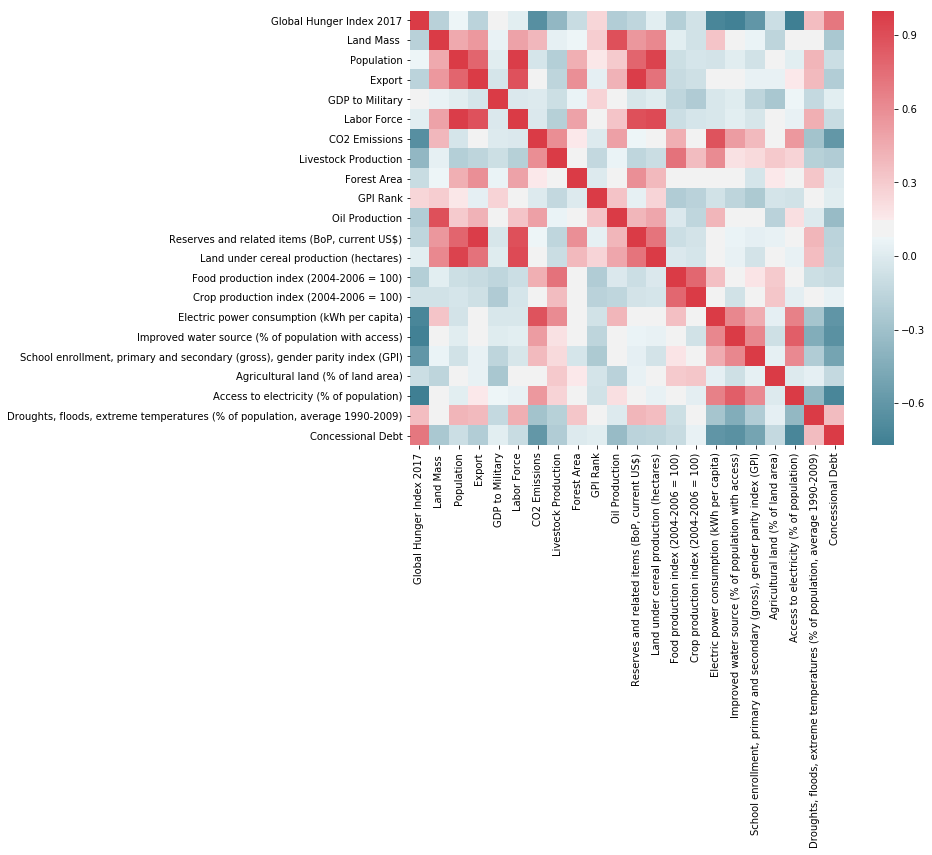

In [12]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


# Search for multicollinearity among narrowed list of indicators

## Indicators with lowest p-values
* GPI Rank
* Food Production Index (2004-2006 = 100)
* Improved water source (% of population with access)

## Creating a subset to identify and analyze the three indicators

In [22]:
df3 = df2[['Country Name','Improved water source (% of population with access)', 'GPI Rank','Food production index (2004-2006 = 100)']]

In [23]:
df3.head()

,Country Name,Improved water source (% of population with access),GPI Rank,Food production index (2004-2006 = 100)
0,Turkey,93.823077,2.48,97.505600
2,Ukraine,97.090909,2.43,106.775652
3,Belarus,99.553846,2.15,104.179565
11,Montenegro,98.244444,1.97,86.791111
14,Romania,88.146154,1.63,93.959600


In [24]:
df3.describe()

,Improved water source (% of population with access),GPI Rank,Food production index (2004-2006 = 100)
count,71.000000,71.000000,71.000000
mean,80.677138,2.170282,95.427312
std,16.252174,0.332956,6.359288
min,33.792308,1.520000,80.142273
25%,72.727227,1.940000,91.989600
50%,83.165385,2.140000,94.436800
75%,93.707692,2.350000,97.897096
max,99.676923,3.220000,121.217200


## Search for multicollinearity 

In [25]:
df3.corr()
# indicators with more than one output above 0.15 are considered collinear

,Improved water source (% of population with access),GPI Rank,Food production index (2004-2006 = 100)
Improved water source (% of population with access),1.000000,-0.154417,0.125796
GPI Rank,-0.154417,1.000000,-0.213514
Food production index (2004-2006 = 100),0.125796,-0.213514,1.000000


In [26]:
y = df2["GPI Rank"]
x = df2[['Improved water source (% of population with access)']]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GPI Rank   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     943.0
Date:                Wed, 23 May 2018   Prob (F-statistic):           2.37e-42
Time:                        23:31:33   Log-Likelihood:                -61.710
No. Observations:                  71   AIC:                             125.4
Df Residuals:                      70   BIC:                             127.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Improved water source (% of population with access)     0.0257      0.001     30.709      0.000       0.024       0.027
==============================================================================
Omnibus:                        5.034   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.336
Skew:                           0.590   Prob(JB):                        0.114
Kurtosis:                       3.274   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

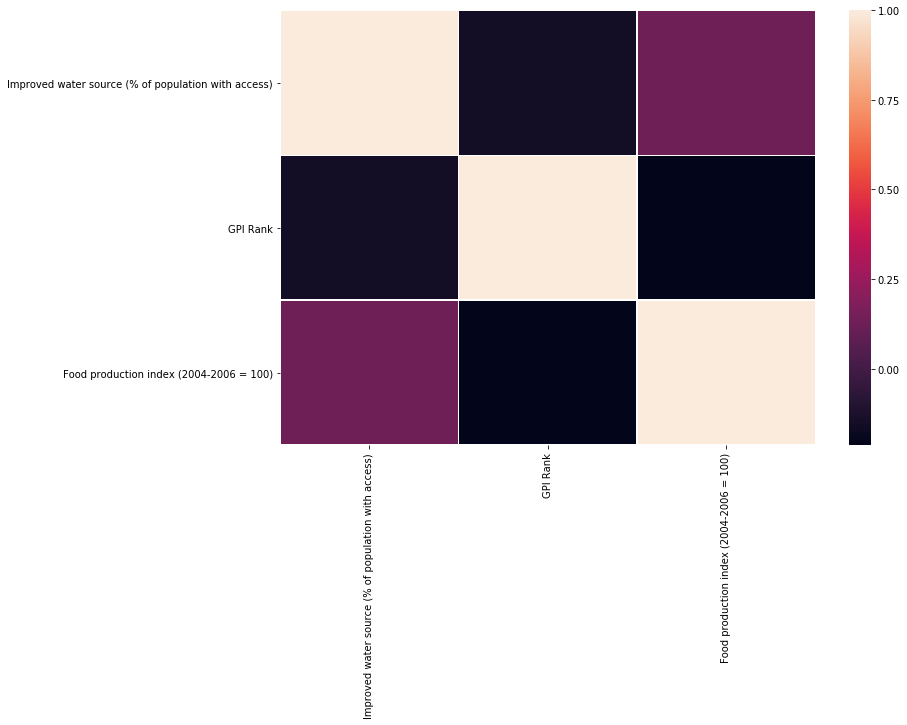

In [27]:
sns.heatmap(df3.corr(), annot=False, linewidths= .5) 
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show();

# Observations

Low collinearity

# Possible Confounders

In [28]:
y = df2["Improved water source (% of population with access)"]
x = df2[["Droughts, floods, extreme temperatures (% of population, average 1990-2009)"]]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Improved water source (% of population with access)   R-squared:                       0.252
Model:                                                             OLS   Adj. R-squared:                  0.241
Method:                                                  Least Squares   F-statistic:                     23.57
Date:                                                 Wed, 23 May 2018   Prob (F-statistic):           7.07e-06
Time:                                                         23:32:40   Log-Likelihood:                -403.56
No. Observations:                                                   71   AIC:                             809.1
Df Residuals:                                                       70   BIC:                             811.4
Df Model:                                                            1                                         
Covariance Type:                                             nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Droughts, floods, extreme temperatures (% of population, average 1990-2009)    17.4150      3.587      4.855      0.000      10.261      24.569
==============================================================================
Omnibus:                       26.140   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.162
Skew:                          -1.548   Prob(JB):                     5.17e-09
Kurtosis:                       4.821   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
y = df2["Food production index (2004-2006 = 100)"]
x = df2[["Improved water source (% of population with access)"]]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Food production index (2004-2006 = 100)   R-squared:                       0.961
Model:                                                 OLS   Adj. R-squared:                  0.960
Method:                                      Least Squares   F-statistic:                     1703.
Date:                                     Wed, 23 May 2018   Prob (F-statistic):           7.18e-51
Time:                                             23:32:54   Log-Likelihood:                -309.80
No. Observations:                                       71   AIC:                             621.6
Df Residuals:                                           70   BIC:                             623.9
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Improved water source (% of population with access)     1.1392      0.028     41.273      0.000       1.084       1.194
==============================================================================
Omnibus:                       13.951   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.302
Skew:                           1.092   Prob(JB):                     0.000476
Kurtosis:                       3.638   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
y = df2['GPI Rank']
x = df2[["Food production index (2004-2006 = 100)"]]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GPI Rank   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     2179.
Date:                Wed, 23 May 2018   Prob (F-statistic):           1.75e-54
Time:                        23:27:19   Log-Likelihood:                -33.396
No. Observations:                  71   AIC:                             68.79
Df Residuals:                      70   BIC:                             71.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Food production index (2004-2006 = 100)     0.0226      0.000     46.681      0.000       0.022       0.024
==============================================================================
Omnibus:                        9.516   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               12.600
Skew:                           0.535   Prob(JB):                      0.00184
Kurtosis:                       4.764   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""